In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
n_points = int(10e4)

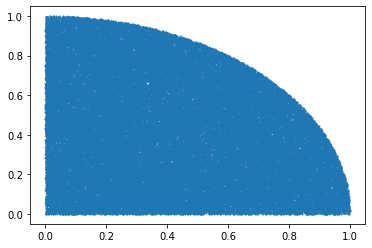

In [3]:
def create_point(n=1000):
    array = []
    for i in range(n):
        x, y = np.random.random(2)
        if -abs(x**2 + y**2) > -1:
            array.append([x, y])
    return np.array(array)


points = create_point(n=n_points)

plt.scatter(points[:,0], points[:,1], s=1)

In [4]:
def find_pareto_front(points, n=10):
    df = pd.DataFrame(points, columns=['X', 'Y'])  # .sort_values('X')
    pareto_front = []

    for i in range(n):
        df_range = df.loc[(0 + i/n < df.X) & (df.X <= 1/n + i/n)]
        if len(df_range) > 0:
            pareto_front.append(list(df.iloc[df_range.Y.idxmax()]))
        
    return np.array(pareto_front)
        
    
pareto_front = find_pareto_front(points, n=100)

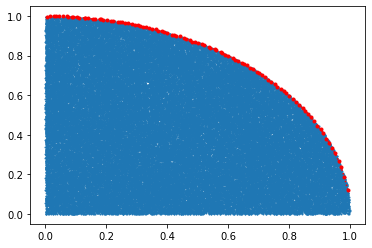

In [5]:
plt.scatter(points[:,0], points[:,1], s=1)
plt.plot(pareto_front[:,0], pareto_front[:,1], c='r', marker='.', linestyle=':')
plt.show()

theta = [[-0.48487528]
 [-0.30787854]
 [ 0.0292612 ]
 [ 0.99336271]]


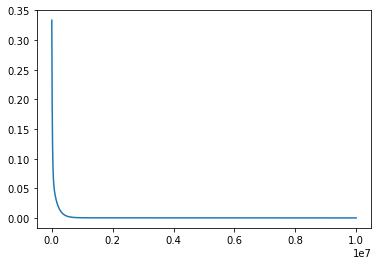

In [9]:
## Algo de machine learning
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(0, iterations):
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history


# Init variables
iterations = int(10e6)
pareto_front_x = pareto_front[:, 0][:, None]
pareto_front_y = pareto_front[:, 1][:, None]


# Init X
X = np.hstack((pareto_front_x, np.ones(pareto_front_x.shape)))
X = np.hstack((pareto_front_x**2, X))
X = np.hstack((pareto_front_x**3, X))

# Init Theta
theta = np.zeros((X.shape[1], 1))  # np.random.randn(X.shape[1], 1)  # np.array([[-1], [0.25], [1]])

# Machine Learning / Descente de Gradient
res_theta, cost_history = gradient_descent(X, pareto_front_y, theta, learning_rate=2*10e-6, iterations=iterations)

print("theta =", res_theta)

plt.plot(range(iterations), cost_history)

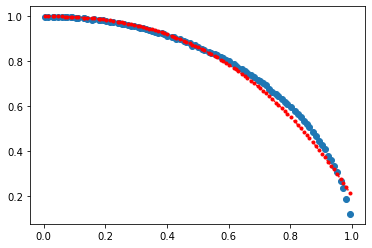

In [12]:
predictions = model(X, res_theta)

plt.scatter(pareto_front[:, 0], pareto_front[:, 1])
plt.plot(pareto_front[:, 0], predictions, c='r', marker='.', linestyle=':')

In [11]:
print(f"""Pour la formule suivante :\n
a*x**3 + b*x**2 + c*x + d\n
On a donc :
- a = {float(res_theta[0])}
- b = {float(res_theta[1])}
- c = {float(res_theta[2])}
- d = {float(res_theta[3])}""")

Pour la formule suivante :

a*x**3 + b*x**2 + c*x + d

On a donc :
- a = -0.4848752780211889
- b = -0.3078785353097801
- c = 0.029261199275199736
- d = 0.9933627086636


On voit qu'il y a un petit soucis surtout sur la fin. C'est très certainement parce que l'on a tracé la ligne de Pareto en se référent à l'axe horizontal. Ainsi, si la courbe est presque parallèle à l'axe horizontal, nous aurons beaucoup de point et plus elle est verticale moins il y a de points. Oui ça représente un cosinus du coup ! 

Ici, on a donc peut de points sur la fin donc moins de poids et donc, plus d'erreur !

---

Thibault **Santonja**  

2021